In [1]:
hamlet_file = "file:///home/rohith/work/data/text/2ws2610.txt"

In [2]:
import re

In [3]:
from operator import  add

In [4]:
import os,findspark
os.environ['SPARK_HOME'] = '/home/rohith/work/spark-1.6.1-bin-without-hadoop'
findspark.init()

In [5]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, Row

In [6]:
APP_NAME = "Logs Spark"
conf = SparkConf().setAppName(APP_NAME)
conf = conf.setMaster("local[*]")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)

In [7]:
hamlet = sc.textFile(hamlet_file)

In [8]:
hamlet.count()

7066

In [9]:
chars = hamlet.map(lambda s: len(s)).reduce(add)

In [10]:
print chars

178912


In [11]:
type(chars)

int

In [12]:
words = hamlet.flatMap(lambda line: re.split('\W+', line.lower().strip()))

In [13]:
words = words.filter(lambda x : len(x) > 3)

In [14]:
words = words.map(lambda w : (w,1))

In [20]:
words = words.reduceByKey(add)

In [16]:
print words

PythonRDD[8] at RDD at PythonRDD.scala:43


In [17]:
words.take(3)

[(u'pardon', 9), (u'nunnery', 5), (u'lunacies', 1)]

In [22]:
words = words.map(lambda x: (x[1], x[0]))

In [23]:
words.sortByKey(False)

PythonRDD[16] at RDD at PythonRDD.scala:43

In [24]:
words.take(5)

[(9, u'pardon'),
 (5, u'nunnery'),
 (1, u'lunacies'),
 (12, u'foul'),
 (4, u'four')]

In [26]:
words.take(5)

[(9, u'pardon'),
 (5, u'nunnery'),
 (1, u'lunacies'),
 (12, u'foul'),
 (4, u'four')]

In [28]:
%matplotlib inline

/home/rohith/anaconda2/envs/sparkexa/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [29]:
import matplotlib.pyplot as plt

In [31]:
def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count, color='grey')
    plt.yticks(range(len(count)), word)

In [42]:
words = words.map(lambda x:(x[1], x[0]))
words.take(25)

[(1, u'zone'),
 (4, u'ythee'),
 (16, u'youth'),
 (1, u'yourselves'),
 (14, u'yourself'),
 (6, u'yours'),
 (255, u'your'),
 (1, u'younger'),
 (17, u'young'),
 (2, u'yorick'),
 (2, u'yonder'),
 (1, u'yond'),
 (1, u'yielding'),
 (2, u'yield'),
 (1, u'yesty'),
 (1, u'yesternight'),
 (1, u'yesterday'),
 (1, u'yeoman'),
 (4, u'years'),
 (8, u'year'),
 (1, u'yawn'),
 (1, u'yaughan'),
 (1, u'yard'),
 (1, u'xxxxx10x'),
 (1, u'wrung')]

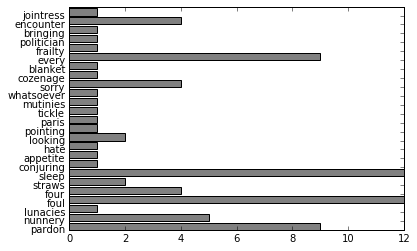

In [34]:
histogram(words.take(25))

In [43]:
words.sortByKey(False)

PythonRDD[51] at RDD at PythonRDD.scala:43

In [44]:
words.take(25)

[(1, u'zone'),
 (4, u'ythee'),
 (16, u'youth'),
 (1, u'yourselves'),
 (14, u'yourself'),
 (6, u'yours'),
 (255, u'your'),
 (1, u'younger'),
 (17, u'young'),
 (2, u'yorick'),
 (2, u'yonder'),
 (1, u'yond'),
 (1, u'yielding'),
 (2, u'yield'),
 (1, u'yesty'),
 (1, u'yesternight'),
 (1, u'yesterday'),
 (1, u'yeoman'),
 (4, u'years'),
 (8, u'year'),
 (1, u'yawn'),
 (1, u'yaughan'),
 (1, u'yard'),
 (1, u'xxxxx10x'),
 (1, u'wrung')]